# Tensors with PyTorch

here the code on how to generate tensor with PyTorch. In this notebook there is also the code about tensor operation with PyTorch. For the theory and other information I will provide a medium article

In [1]:
import numpy as np
import torch

In [2]:
x = np.array(7)
y = np.array([1, 3, 5, 7])
z = np.array([[1, 3, 5, 7], [9, 11, 13, 15]])
w = np.array([[[1, 3, 5, 7], [9, 11, 13, 15]], [[1, 3, 5, 7], [9, 11, 13, 15]], [[1, 3, 5, 7], [9, 11, 13, 15]]])
print(f" x rank: {x.ndim}, shape: {x.shape}, data type: {x.dtype} " )
print(f" y rank: {y.ndim}, shape: {y.shape}, data type: {y.dtype} " )
print(f" z rank: {z.ndim}, shape: {z.shape}, data type: {z.dtype} " )
print(f" w rank: {w.ndim}, shape: {w.shape}, data type: {w.dtype} " )

 x rank: 0, shape: (), data type: int64 
 y rank: 1, shape: (4,), data type: int64 
 z rank: 2, shape: (2, 4), data type: int64 
 w rank: 3, shape: (3, 2, 4), data type: int64 


In [3]:
#you can create tensor of different datatype specifying it
x = torch.tensor(7, dtype=torch.float32)
y = torch.tensor(7, dtype=torch.int32)
x, y

(tensor(7.), tensor(7, dtype=torch.int32))

In [4]:
#tensor of different rank and shape.
#they are equivalent to the same structures obtained by numpy
x = torch.tensor(7)
y = torch.tensor([1, 3, 5, 7])
z = torch.tensor([[1, 3, 5, 7], [9, 11, 13, 15]])
w = torch.tensor([[[1, 3, 5, 7], [9, 11, 13, 15]], [[1, 3, 5, 7], [9, 11, 13, 15]], [[1, 3, 5, 7], [9, 11, 13, 15]]])
x, y, z, w

(tensor(7),
 tensor([1, 3, 5, 7]),
 tensor([[ 1,  3,  5,  7],
         [ 9, 11, 13, 15]]),
 tensor([[[ 1,  3,  5,  7],
          [ 9, 11, 13, 15]],
 
         [[ 1,  3,  5,  7],
          [ 9, 11, 13, 15]],
 
         [[ 1,  3,  5,  7],
          [ 9, 11, 13, 15]]]))

In [5]:
#you can check the property:
x = torch.tensor([[1,2,3],[4,5,6]])
print(f" x rank: {x.ndim}, shape: {x.size()}, data type: {x.dtype}, total sum of element: {x.sum()}, is a tensor:{torch.is_tensor(x)} " )


 x rank: 2, shape: torch.Size([2, 3]), data type: torch.int64, total sum of element: 21, is a tensor:True 


In [6]:
#creating tensor
#from numpy array
z = np.array([[1, 3, 5, 7], [9, 11, 13, 15]])
torch.as_tensor(z), torch.from_numpy(z)
#with range (working like range )
torch.arange(1,5,1)
#with all zeroes or 1
torch.zeros(size = [2,2]), torch.ones(size = [2,2])
#get the same shape of another element, but filled with zeroes or 1
x = torch.arange(1,5,1)
torch.zeros_like(x), torch.ones_like(x)

(tensor([0, 0, 0, 0]), tensor([1, 1, 1, 1]))

## Tensor operation
* addition
* subtraction
* dot product
* Hadamand product (multiplication element wise)

In [7]:
#operation with tensors:
x = torch.tensor([[1,2], [3,4]], dtype=torch.int64)
y = torch.tensor([[5,6], [7,8]], dtype=torch.int64)
# * is for the dot product, @ for the element wise product
print(x + y)
print(x - y)
print(x @ y)
print(x * y)


tensor([[ 6,  8],
        [10, 12]])
tensor([[-4, -4],
        [-4, -4]])
tensor([[19, 22],
        [43, 50]])
tensor([[ 5, 12],
        [21, 32]])


In [8]:
#you can obtain the same results also in this way, using the tensor method
#but you can also call the torch function
x.add(y), torch.add(x,y)
x.subtract(y), torch.subtract(x,y)
x.multiply(y), torch.multiply(x, y)
x.matmul(y), torch.matmul(x, y)

(tensor([[19, 22],
         [43, 50]]),
 tensor([[19, 22],
         [43, 50]]))

In [9]:
#broadcasting
x = torch.tensor([[1,2], [3,4], [5,6]], dtype=torch.int64)
y = torch.tensor([5,10], dtype=torch.int64)
x + y

tensor([[ 6, 12],
        [ 8, 14],
        [10, 16]])

In [10]:
#tensor reshape
x = torch.tensor([[1,2], [3,4], [5,6]], dtype=torch.int64)
#you can do in two way
x.reshape([2,3]), torch.reshape(x, [2,3])
print(x.reshape([2,3]))
#eliminating a dimension
print(x.reshape([-1]))

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([1, 2, 3, 4, 5, 6])


In [11]:
#transpose
x = torch.tensor([[1,2], [3,4], [5,6]], dtype=torch.int64)
#you can do in this way
torch.t(x)
#or like this, but you have to specify the dimension to be transposed
torch.transpose(x, 0, 1)

tensor([[1, 3, 5],
        [2, 4, 6]])

# Visualize tensor operation

In [12]:
# Install TorchLens
!apt install graphviz
!pip install torchlens

# Install example networks
!pip install visualpriors

# Imports
import time
import torch
from torch import nn
import torchvision
import torchlens as tl
import visualpriors

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visualpriors: filename=visualpriors-0.3.5-py3-none-any.whl size=11367 sha256=59cba35b0377dafbe77cca0a68884b547bd15137fc37b10fd8e4e42420a34e83
  Stored in directory: /root/.cache/pip/wheels/ce/18/2b/ac0e173977d8a72ea7155168fbaa891e5e8e4cafa01957cba3
Successfully built visualpriors


/usr/local/lib/python3.10/dist-packages/torch/overrides.py:110: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  torch.has_cuda,
/usr/local/lib/python3.10/dist-packages/torch/overrides.py:111: UserWarning: 'has_cudnn' is deprecated, please use 'torch.backends.cudnn.is_available()'
  torch.has_cudnn,
/usr/local/lib/python3.10/dist-packages/torch/overrides.py:117: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  torch.has_mps,
/usr/local/lib/python3.10/dist-packages/torch/overrides.py:118: UserWarning: 'has_mkldnn' is deprecated, please use 'torch.backends.mkldnn.is_available()'
  torch.has_mkldnn,


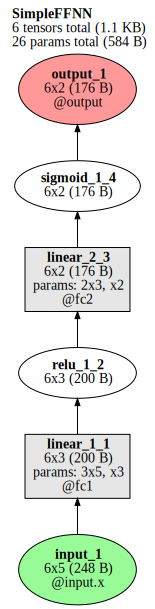

In [17]:
#visualize simple neural network

class SimpleFFNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(5, 3)
        self.fc2 = nn.Linear(3, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        x = nn.functional.sigmoid(x)
        return x


x = torch.rand(6, 5)
ff_model = SimpleFFNN()
model_history = tl.log_forward_pass(ff_model, x, vis_opt='unrolled')

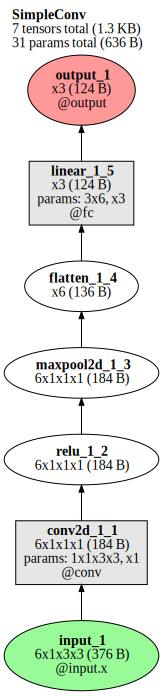

In [15]:
class SimpleConv(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 1, 3, padding=0)
        self.fc = nn.Linear(6, 3)

    def forward(self, x):
        x = self.conv(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 1)
        x = x.flatten()
        x = self.fc(x)
        return x


x = torch.rand(6, 1, 3, 3)
ff_model = SimpleConv()
model_history = tl.log_forward_pass(ff_model, x, vis_opt='unrolled')

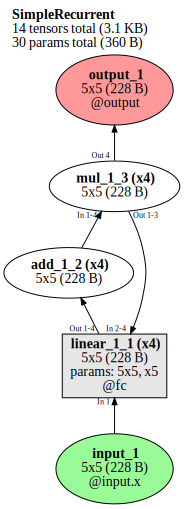

Log of SimpleRecurrent forward pass:
	Random seed: 1902145391
	Time elapsed: 0.963s (0.961s spent logging)
	Structure:
		- recurrent (at most 4 loops)
		- no branching
		- no conditional (if-then) branching
		- 1 total modules
	Tensor info:
		- 14 total tensors (3.1 KB) computed in forward pass.
		- 14 tensors (3.1 KB) with saved activations.
	Parameters: 1 parameter operations (30 params total; 360 B)
	Module Hierarchy:
		fc:1
		fc:2
		fc:3
		fc:4
	Layers (all have saved activations):
		  (0) input_1 
		  (1) linear_1_1:1  (1/4 passes)
		  (2) add_1_2:1  (1/4 passes)
		  (3) mul_1_3:1  (1/4 passes)
		  (4) linear_1_1:2  (2/4 passes)
		  (5) add_1_2:2  (2/4 passes)
		  (6) mul_1_3:2  (2/4 passes)
		  (7) linear_1_1:3  (3/4 passes)
		  (8) add_1_2:3  (3/4 passes)
		  (9) mul_1_3:3  (3/4 passes)
		  (10) linear_1_1:4  (4/4 passes)
		  (11) add_1_2:4  (4/4 passes)
		  (12) mul_1_3:4  (4/4 passes)
		  (13) output_1 
Layer linear_1_1 (pass 2/4), operation 4/12:
	Output tensor: shape=(5, 5),

In [16]:
#simple recurrent neural network
class SimpleRecurrent(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(in_features=5, out_features=5)

    def forward(self, x):
        for r in range(4):
            x = self.fc(x)
            x = x + 1
            x = x * 2
        return x

model = SimpleRecurrent()
x = torch.rand(5, 5)
model_history = tl.log_forward_pass(model, x,
                                    layers_to_save='all',
                                    vis_opt='rolled')
print(model_history)
print(model_history['linear_1_1:2'])